In [17]:
"""
This notebook investigates gradient
descent applied to linear regression
"""

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use('ggplot')
plt.xkcd()

In [19]:
data = np.loadtxt('ex1data1.txt', delimiter=',', usecols=(0, 1), unpack=True)

# Initialize feature and label data
X = np.transpose(np.array(data[:-1]))
y = np.transpose(np.array(data[-1:]))
m = y.size

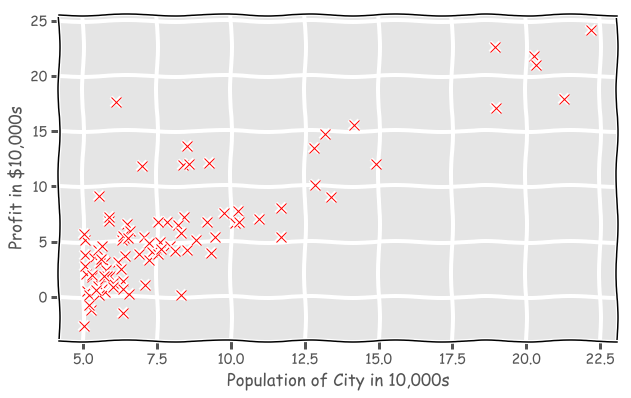

In [20]:
# Plotting data
plt.figure(figsize=(10, 6))
plt.plot(X, y, 'rx', markersize=10)
plt.grid(True)
plt.xlabel('Population of City in 10,000s');
plt.ylabel('Profit in $10,000s');

In [5]:
# Cost function

def computeCost(X, y, theta):
    return float(1. / (2*m) * (X @ theta - y).T @ (X @ theta - y))

# Add ones to X
X = np.insert(X, 0, 1, axis=1) # input arr, obj(index)=0, values=1, axis=across columns
theta = np.zeros((X.shape[1],1)) # n x 1 vector of theta, n is number of features

iterations = 1500
alpha = 0.01

J = computeCost(X, y, theta)

print("Cost of initial theta: {}".format(J))

Cost of initial theta: 32.07273387745567


In [6]:
# Gradient descent
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = []
    theta_history = []
    
    for i in range(num_iters):
        delta = (alpha/m) * (X.T @ (X @ theta - y))
        theta = theta - delta
        J_history.append(computeCost(X, y, theta))
        theta_history.append(theta)
    
    return theta, J_history, theta_history

theta, J_history, theta_history = gradientDescent(X, y, theta, alpha, iterations)

print("Theta after Gradient Descent: \n{}".format(theta))

Theta after Gradient Descent: 
[[-3.63029144]
 [ 1.16636235]]


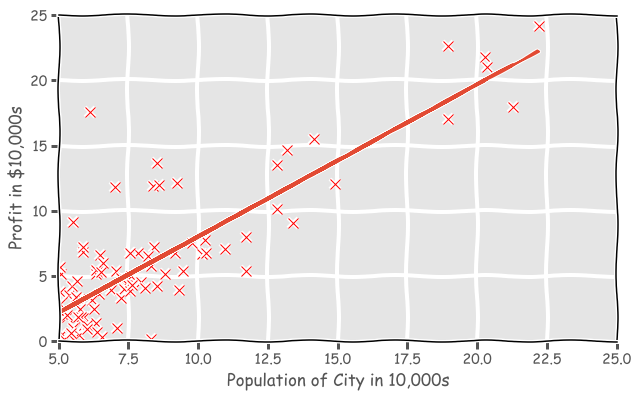

In [7]:
# Plot linear regression fit

plt.figure(figsize=(10, 6))
plt.plot(X, y, 'rx', markersize=10)
plt.axis([5, 25, 0, 25])
plt.xlabel('Population of City in 10,000s');
plt.ylabel('Profit in $10,000s');
plt.grid(True)

plt.plot(X[:, 1], X @ theta, '-')

plt.show()


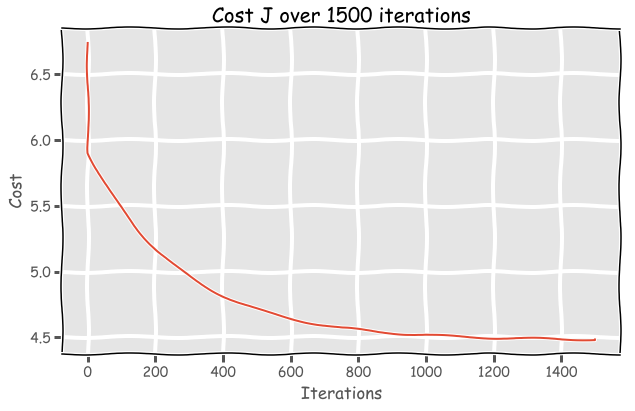

In [8]:
# Visualizing cost

plt.figure(figsize=(10, 6))
plt.plot(J_history, markersize=10)
plt.grid(True)
plt.title('Cost J over 1500 iterations')
plt.xlabel('Iterations');
plt.ylabel('Cost');

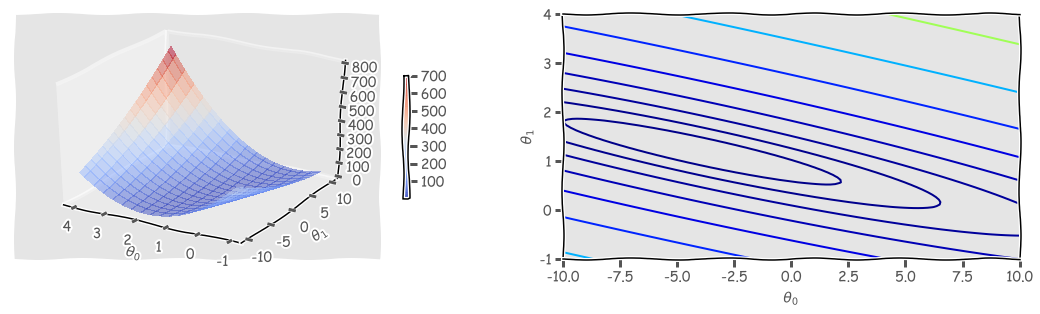

In [11]:
# Visualizing theta
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(18, 4.5))

# Initialize variables
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);
J_vals = np.zeros((theta0_vals.size, theta1_vals.size))

for i in range(theta0_vals.size):
    for j in range(theta1_vals.size):
        t = np.array([[theta0_vals[i]], [theta1_vals[j]]]) # Numpy arrays, double nested
        J_vals[i, j] = computeCost(X, y, t)

# Convert to 2-d arrays for plotting
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)
        
### Surface Plot ###
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(theta1_vals, theta0_vals, J_vals.T, rstride=6, cstride=6, alpha=0.5, \
                       cmap=cm.coolwarm, antialiased=False)
cb = fig.colorbar(surf, shrink=0.5)
ax1.set_xlim(ax1.get_xlim()[::-1])  # invert x axis 
ax1.set_zlim(0, 800);
plt.ylabel(r'$\theta_1$', fontsize=14)
plt.xlabel(r'$\theta_0$', fontsize=14)

### Contour Plot ###
ax2 = fig.add_subplot(1, 2, 2)
cnt = ax2.contour(theta0_vals, theta1_vals, J_vals.T, np.logspace(-2, 3, 20), cmap=cm.jet)
plt.ylabel(r'$\theta_1$', fontsize=14)
plt.xlabel(r'$\theta_0$', fontsize=14)